In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

import os
import sys
sys.path.append(os.path.abspath('../'))
from simulation import model
from simulation.data import io
from simulation import simulation

In [2]:
horizons = simulation.time_ignoring_horizons(model.bipartite_graph, model.participants)

Time-ignoring simulation: 100%|██████████| 37103/37103 [06:39<00:00, 92.88it/s]  


In [11]:
def default(obj):
    if isinstance(obj, set):
        return list(obj)
    raise TypeError



In [12]:
s = orjson.dumps(horizons, default=default)


In [ ]:
s1 = json.dumps(horizons, default=)

In [ ]:
class SetEncoder(json.JSONEncoder):
    def default(self, obj):
        if isinstance(obj, set):
            return list(obj)
        return self.default(obj)

In [11]:
ACMBlue = '#00cfe6'
ACMYellow = '#ffd600'
ACMOrange = '#fc9200'
ACMRed = '#ff1924'
ACMLightBlue = '#82fcff'
ACMGreen = '#a5cf00'
ACMPurple = '#6200d9'
ACMDarkBlue = '#0055c9'

plt.rcParams.update({
    "font.family": "serif",  # use serif/main font for text elements
    "text.usetex": True,     # use inline math for ticks
    "pgf.rcfonts": False     # don't setup fonts from rc parameters
    })

# Time-ignoring horizon

In [4]:
time_ignoring_horizon = io.load_horizon_cardinalities(is_time_respecting=False, file_name='simulation_results.hdf')

TypeError: load_horizon_cardinalities() got an unexpected keyword argument 'time_respecting'

In [64]:
time_ignoring_horizon.describe()

count    37103.000000
mean     29660.009218
std      10203.647618
min          0.000000
25%      33172.000000
50%      33172.000000
75%      33172.000000
max      33172.000000
dtype: float64

Largest components

In [14]:
for s in sorted([len(cc & model.participants) for cc in nx.connected_components(model.bipartite_graph)], reverse=True)[0:5]:
    print(s, '{:.2%}'.format(s/len(model.participants)))

33173 89.41%
108 0.29%
93 0.25%
66 0.18%
61 0.16%


# Time-respecting horizon

In [15]:
time_respecting_horizon = io.load_simulation_results(time_respecting=True)

In [16]:
time_respecting_horizon.describe()

count    37103.000000
mean     10907.352317
std       9286.130779
min          0.000000
25%        201.000000
50%      11652.000000
75%      19921.000000
max      26216.000000
dtype: float64

In [17]:
'{:.2%}'.format(26216/len(model.participants))

'70.66%'

# Difference between both models

In [18]:
diff = time_ignoring_horizon - time_respecting_horizon

In [19]:
diff.describe()

count    37103.000000
mean     18752.656901
std      10667.821208
min          0.000000
25%      10912.000000
50%      16822.000000
75%      30537.000000
max      33171.000000
dtype: float64

# Plots

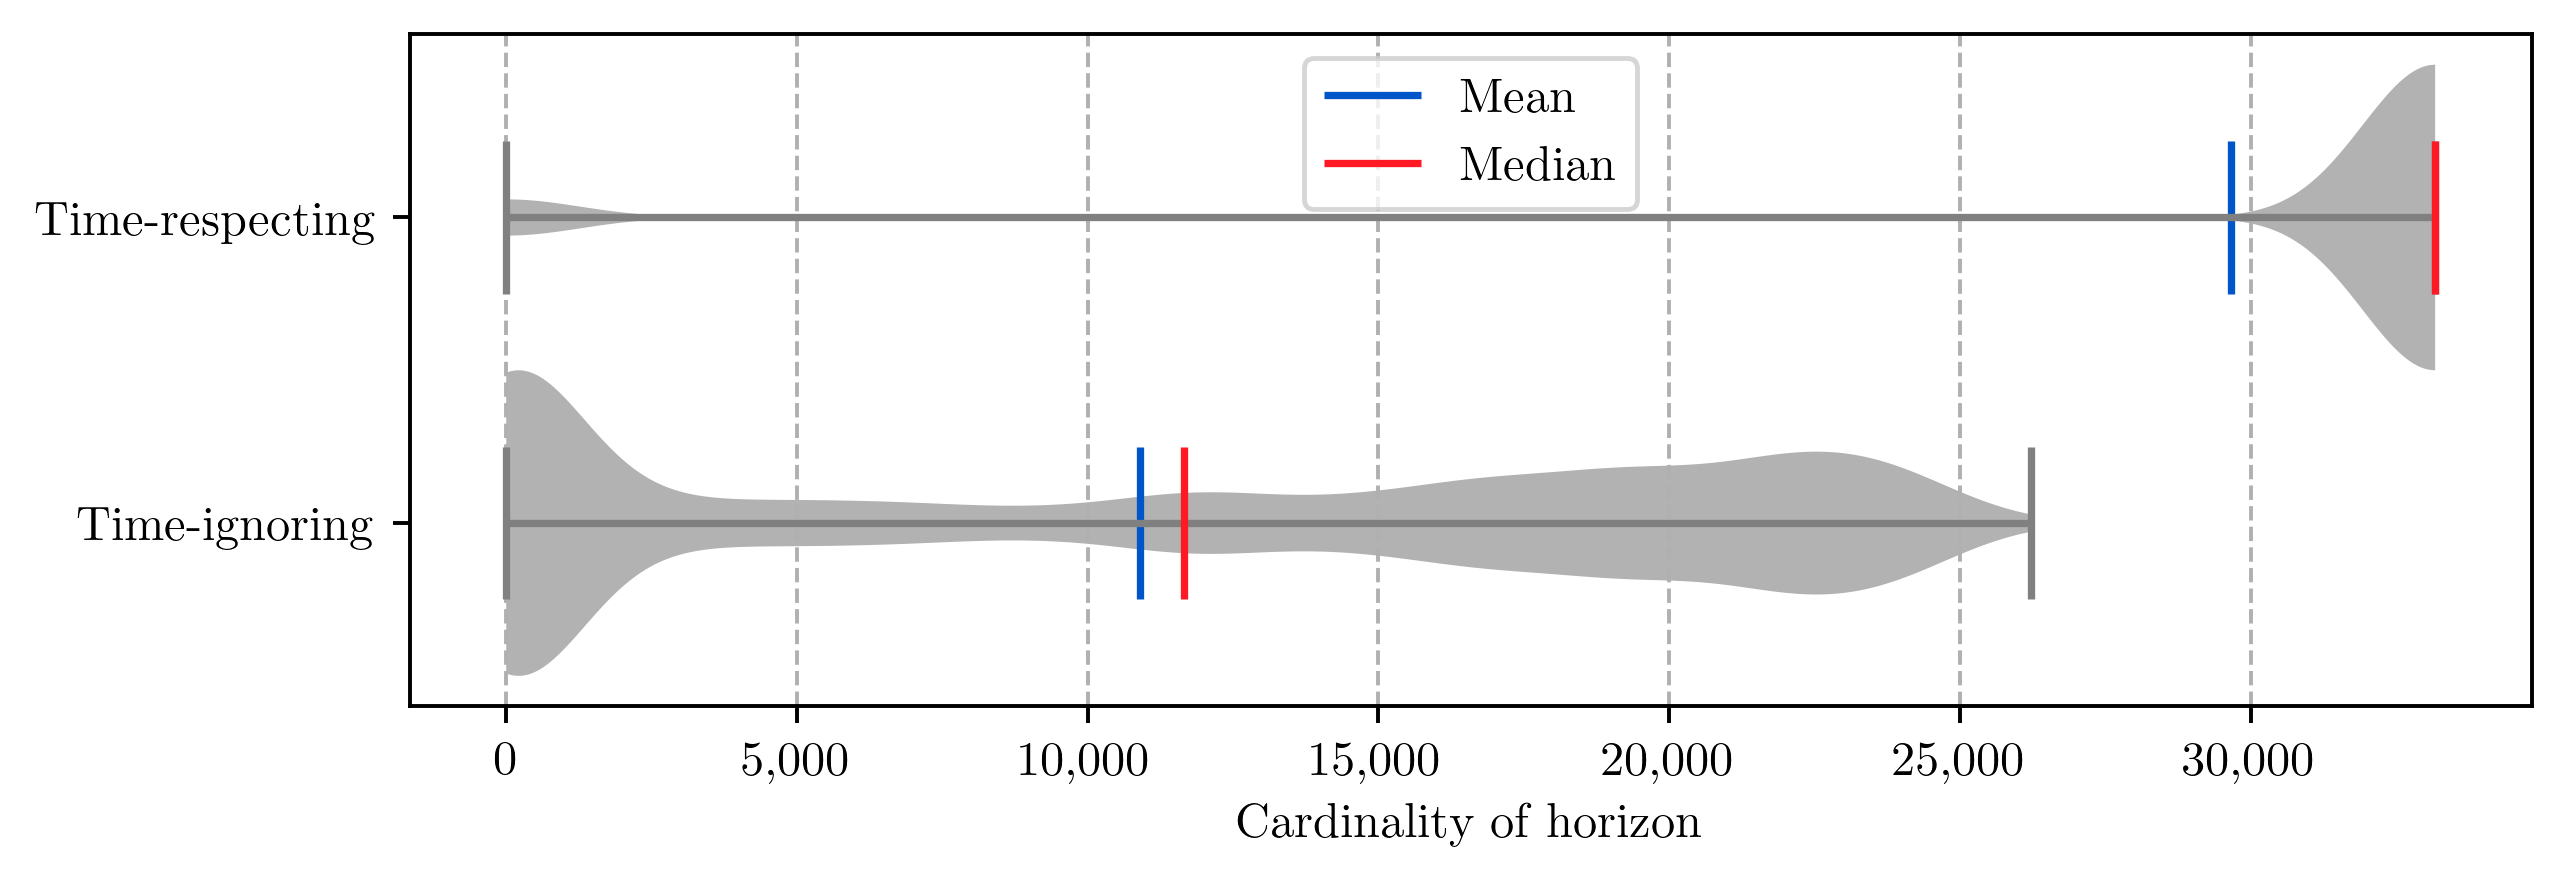

In [62]:
fig, ax = plt.subplots(figsize=(7.22, 7.22/3), dpi=350, constrained_layout=True)

violinplot = ax.violinplot([time_respecting_horizon, time_ignoring_horizon], vert=False, showmeans=True, showmedians=True, points=1000, widths=1, showextrema=True);

for i in violinplot['bodies']:
    i.set_facecolor('black')

violinplot['cmeans'].set_color(ACMDarkBlue)
violinplot['cmeans'].set_label('Mean')

violinplot['cmedians'].set_color(ACMRed)
violinplot['cmedians'].set_label('Median')

for k in ['cmaxes', 'cmins', 'cbars']:
    violinplot[k].set_color('gray')

yticklabels = ['Time-ignoring', 'Time-respecting']
ax.set_yticks([1, 2])
ax.set_yticklabels(yticklabels)
ax.set_xlabel('Cardinality of horizon')
ax.xaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))

ax.grid(which='both', axis='x', linestyle='--')
plt.legend(loc='upper center');

plt.savefig('../plots/dist.pgf', dpi=1000, bbox_inches='tight')

In [1]:
fig, ax = plt.subplots(figsize=(3.5, 3.5), dpi=150, constrained_layout=True);

violinplot = ax.violinplot(diff, vert=True, showmeans=True, showmedians=True, points=1000, widths=0.8, showextrema=True);

for i in violinplot['bodies']:
    i.set_facecolor('black')

violinplot['cmeans'].set_color(ACMDarkBlue)
violinplot['cmeans'].set_label('Mean')

violinplot['cmedians'].set_color(ACMRed)
violinplot['cmedians'].set_label('Median')

for k in ['cmaxes', 'cmins', 'cbars']:
    violinplot[k].set_color('gray')

ax.set_xticks([], minor=False)
ax.set_ylabel('Cardinality of horizon')
ax.yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))

ax.grid(which='both', axis='y', linestyle='--')
plt.legend(loc='best');
plt.savefig('../plots/diff.pgf', dpi=1000, bbox_inches = 'tight')


{'-1000045392462314428': {'end': '2020-02-05 12:49:39',
  'participants': ['-4790071369877151138', '-6410414390854871141'],
  'start': '2020-02-04 07:10:58'},
 '-1000155334900579290': {'end': '2020-02-14 12:02:50',
  'participants': ['2844916146615455637', '5974504138184251821'],
  'start': '2020-02-13 10:03:41'},
 '-1000262927563429693': {'end': '2020-02-14 07:08:52',
  'participants': ['8345197386421647393', '-271940996582732581'],
  'start': '2020-02-14 02:28:04'},
 '-1000280455370549646': {'end': '2020-02-18 06:45:09',
  'participants': ['-6151973285778263208'],
  'start': '2020-02-18 06:45:09'},
 '-1000323066631149051': {'end': '2020-02-04 05:56:23',
  'participants': ['7607429369991351972',
   '8448794345355308483',
   '7049818332800571877'],
  'start': '2020-02-04 03:07:26'},
 '-1000323801650968179': {'end': '2020-02-28 12:54:36',
  'participants': ['-3099947360453996974',
   '-4721227264494349983',
   '-4040287695374403905'],
  'start': '2020-02-28 04:46:29'},
 '-10003250662699